# TITANIC classification

In [141]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Reading example output data

Its an example file of predictions. That's how my output file should look like.

In [142]:
titanic_example = pd.read_csv(r'datasets\titanic\gender_submission.csv')
titanic_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [143]:
titanic_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Reading the data
These are real data. They are already split into train and test set.

In [144]:
test = pd.read_csv(r'datasets\titanic\test.csv')
titanic = pd.read_csv(r'datasets\titanic\train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [147]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Pclass: a proxy of socio-economic status
1 = upper
2 = middle
3 = lower

In [148]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [149]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [150]:
titanic[titanic['Age'] < 1]['Age'].sort_values()

803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
831    0.83
305    0.92
Name: Age, dtype: float64

In [151]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

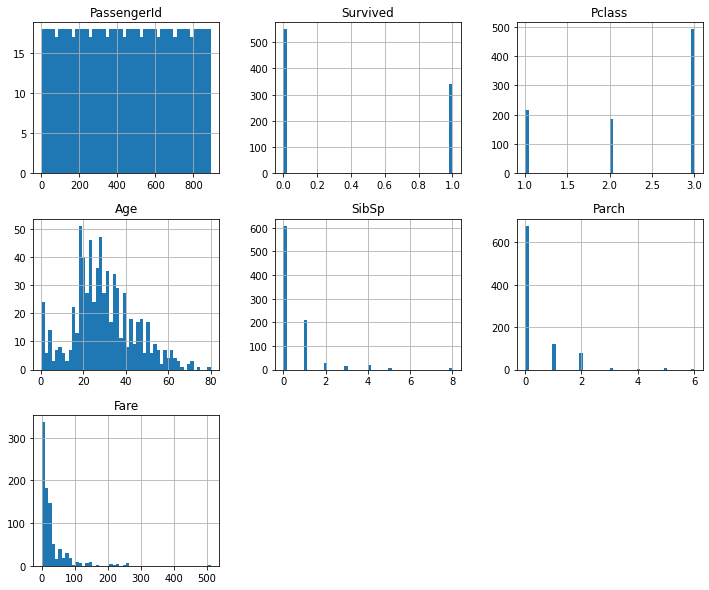

In [152]:
titanic.hist(bins=50, figsize=(12,10))
plt.show()

### Data preparation

In [209]:
irrelevant_columns = ['Name', 'Ticket', 'PassengerId', 'Cabin']
train = titanic.drop(irrelevant_columns, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Deleting the records that has NaN values in Age column 

In [210]:
train.dropna(subset=['Age'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [211]:
corr = train.corr()
corr['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [212]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [213]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

cat_col = ['Sex', 'Embarked']
num_col = [col for col in X_train.columns.values if col not in cat_col]

num_pip = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('standard_scaler', StandardScaler()),
])
cat_pip = Pipeline([
    ('one_hot', OneHotEncoder()),
])

full_prep_pipeline = ColumnTransformer([
    ('num', num_pip, num_col),
    ('cat_pip', cat_pip, cat_col)
])

X_train_prepared = full_prep_pipeline.fit_transform(X_train)

### Model selection functions

In [214]:
def plot_prec_rec_thres(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'r-', label="Recall")
    plt.legend(loc='center left', fontsize=16)
    plt.xlabel('Threshold', fontsize=16)
    plt.grid(True)
    plt.show()

In [215]:
def plot_prec_rec(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.grid(True)
    plt.axis([0, 1, 0, 1])

In [216]:
def  plot_roc_curve(tpr, fpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

### Model selection


#### SGD Classifier

In [217]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

sgd_clf = SGDClassifier()
rand_params = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': reciprocal(0.0001, 0.001),
}

sgd_rand = RandomizedSearchCV(sgd_clf, rand_params, n_iter=100,
                              scoring='accuracy', cv=5, return_train_score=True)

sgd_rand.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023DACB8B130>,
                                        'loss': ['hinge', 'log',
                                                 'modified_huber'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   return_train_score=True, scoring='accuracy')

In [218]:
sgd_clf = sgd_rand.best_estimator_

In [219]:
y_predictions = sgd_clf.predict(X_train_prepared)

In [220]:
y_scores = cross_val_score(sgd_clf, X_train_prepared, y_train, cv=5,
                           scoring='accuracy')


In [221]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

print(confusion_matrix(y_train, y_predictions))
print(precision_score(y_train, y_predictions))
print(recall_score(y_train, y_predictions))

[[467  82]
 [ 91 251]]
0.7537537537537538
0.7339181286549707


In [222]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_predictions)
recalls

array([1.        , 0.73391813, 0.        ])

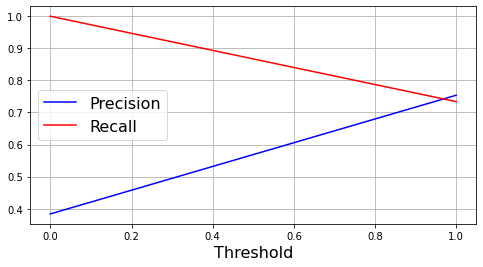

In [223]:
plt.figure(figsize=(8, 4))
plot_prec_rec_thres(precisions, recalls, thresholds)

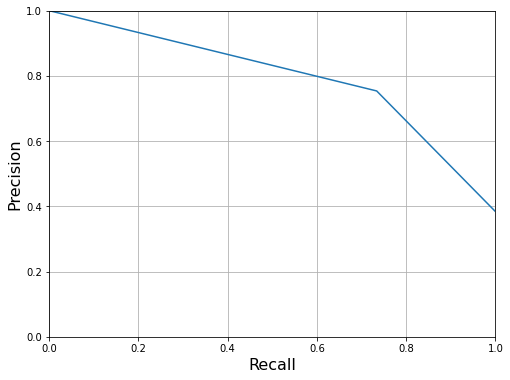

In [224]:
plt.figure(figsize=(8, 6))
plot_prec_rec(precisions, recalls)

In [225]:
y_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=3,
                             method='decision_function')

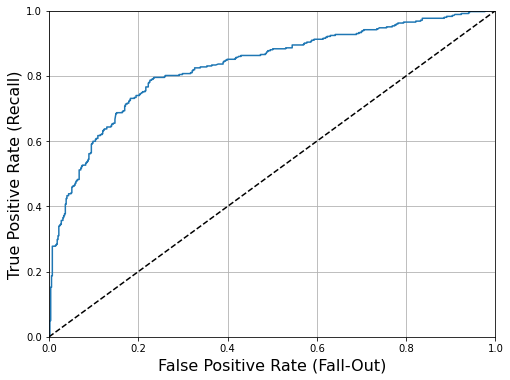

In [226]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(tpr, fpr)

In [227]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.8300684924210953

#### K Neighbor

In [232]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
rand_params = {
    'n_neighbors': np.arange(1,10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

kn_rand = RandomizedSearchCV(kn_clf, rand_params, scoring='accuracy', cv=5,
                             n_iter=100, return_train_score=True)
kn_rand.fit(X_train_prepared, y_train)

g:\hobby\programowanie\Python\9_machine_learning\ML_learning\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='accuracy')

In [236]:
kn_best = kn_rand.best_estimator_
y_predicted = kn_best.predict(X_train_prepared)

print(confusion_matrix(y_train, y_predicted))
print(precision_score(y_train, y_predicted))
print(recall_score(y_train, y_predicted))

[[501  48]
 [ 72 270]]
0.8490566037735849
0.7894736842105263


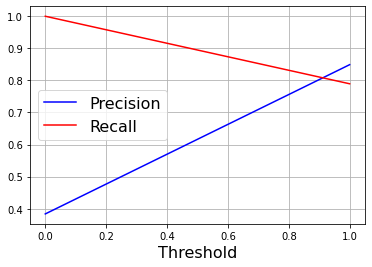

In [238]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_predicted)
plot_prec_rec_thres(precisions, recalls, thresholds)

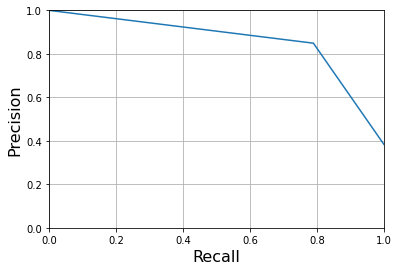

In [244]:
plot_prec_rec(precisions, recalls)

In [243]:
y_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=3,
                             method='decision_function')

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

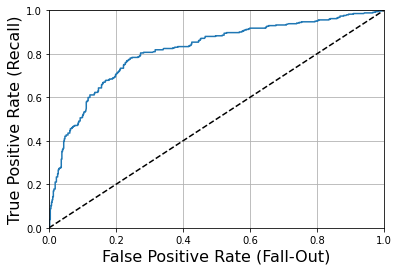

In [245]:
plot_roc_curve(tpr, fpr)

In [246]:
roc_auc_score(y_train, y_scores)

0.8159279498077312

#### Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
rand_params = {
    'n_estimators': np.arange(50,200),
    'criterion': ["gini", "entropy"],
    'min_samples_split': reciprocal(0.001, 0.5),
    'min_samples_leaf': reciprocal(0.001, 0.5),
}

forest_rand = RandomizedSearchCV(forest_clf, rand_params, scoring='accuracy',
                                 cv=5, n_iter=100, return_train_score=True)
forest_rand.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023DACE33430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023DACE201C0>,
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57...
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])}

In [261]:
forest_best = forest_rand.best_estimator_

In [262]:
y_predicted = forest_best.predict(X_train_prepared)

In [263]:
y_probas = cross_val_predict(forest_best, X_train_prepared, y_train, cv=3,
                             method='predict_proba')
y_scores = y_probas[:, 1]

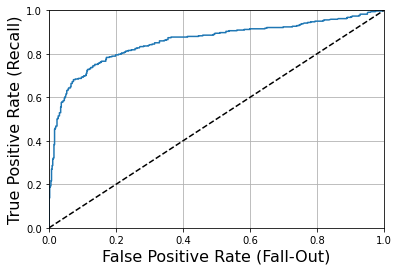

In [264]:
fpr, tpr, threshold = roc_curve(y_train, y_scores)
plot_roc_curve(tpr, fpr)

In [265]:
roc_auc_score(y_train, y_scores)

0.857851596203624

### Predictions on test set

In [269]:
X = test.copy()
X_prep = full_prep_pipeline.transform(X)

test_predictions = kn_best.predict(X_prep)

In [275]:
ids = np.asarray(X['PassengerId'])
predictions = np.c_[ids, test_predictions]

In [277]:
import csv

In [280]:
filename = r'datasets\titanic\predictions2.csv'

with open(filename, 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['PassengerID', 'Survived'])
    writer.writerows(predictions)